In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm
from matplotlib import rc
import platform
import matplotlib as mpl

In [2]:
font_location = 'C:/Users/yeonn/AppData/Local/Microsoft/Windows/Fonts/D2Coding-Ver1.3.2-20180524-all.ttc' 
font_name = fm.FontProperties(fname=font_location).get_name()
plt.rc('font', family=font_name)

In [3]:
df=pd.read_csv('data3.csv')

In [4]:
df.drop(axis=1,columns='B2B 기업 매출(%)',inplace=True)

In [5]:
df['기업형태'] = np.where(df['기업형태'] == 0, '개인', '법인')
# 창업자 학력 변환
education_mapping = {
    1: '중졸이하',
    2: '고졸',
    3: '전문대졸',
    4: '대졸',
    5: '석사',
    6: '박사'}
df['창업자 학력'] = df['창업자 학력'].map(education_mapping)


In [6]:
df['창업이전자기자금'] = np.where(df['창업이전자기자금'] == 0, 0 , '창업이전자기자금')
df['창업이전개인간차용'] = np.where(df['창업이전개인간차용'] == 0, 0 , '창업이전개인간차용')
df['창업이전정부출연금보조금'] = np.where(df['창업이전정부출연금보조금'] == 0, 0 , '창업이전정부출연금보조금')
df['창업이전정부융자보증'] = np.where(df['창업이전정부융자보증'] == 0, 0 , '창업이전정부융자보증')
df['창업이전엔젤벤처캐피탈투자'] = np.where(df['창업이전엔젤벤처캐피탈투자'] == 0, 0 , '창업이전엔젤벤처캐피탈투자')
df['창업이전은행비은행대출'] = np.where(df['창업이전은행비은행대출'] == 0, 0 , '창업이전은행비은행대출')

In [7]:
df['창업이후자기자금'] = np.where(df['창업이후자기자금'] == 0, 0 , '창업이후자기자금')
df['창업이후개인간차용'] = np.where(df['창업이후개인간차용'] == 0, 0 , '창업이후개인간차용')
df['창업이후정부출연금보조금'] = np.where(df['창업이후정부출연금보조금'] == 0, 0 , '창업이후정부출연금보조금')
df['창업이후정부융자대출'] = np.where(df['창업이후정부융자대출'] == 0, 0 , '창업이전정부융자보증')
df['창업이후엔젤벤처캐피탈투자'] = np.where(df['창업이후엔젤벤처캐피탈투자'] == 0, 0 , '창업이후엔젤벤처캐피탈투자')
df['창업이후은행비은행대출'] = np.where(df['창업이후은행비은행대출'] == 0, 0 , '창업이후은행비은행대출')
df['창업이후주식회사채발행'] = np.where(df['창업이후주식회사채발행'] == 0, 0 , '창업이후주식회사채발행')


In [8]:
df['위탁영업 여부'] = np.where(df['위탁영업 여부'] == 0, 0 , '위탁영업')
df['해외진출여부'] = np.where(df['해외진출여부'] == 0, 0 , '해외진출')
df['홍보마케팅 유무'] = np.where(df['홍보마케팅 유무'] == 0, 0 , '홍보마케팅')
df['연구인력 보유여부'] = np.where(df['연구인력 보유여부'] == 0, 0 , '연구인력')
df['산업재산권 보유여부'] = np.where(df['산업재산권 보유여부'] == 0, 0 , '산업재산권')

In [9]:
drop_minor=['산업재산권 보유여부','연구인력 보유여부','홍보마케팅 유무','해외진출여부','위탁영업 여부','창업교육 경험']
df.drop(axis=1,columns=drop_minor,inplace=True)

In [10]:
region_mapping = {
    1: '대학',
    2: '산업단지',
    3: '일반상업',
    4: '일반주택',
    5: '기타'}
df['사업장 입지'] = df['사업장 입지'].map(region_mapping)


In [11]:
capital_before=['창업이전자기자금', '창업이전개인간차용',
       '창업이전정부출연금보조금', '창업이전정부융자보증', '창업이전엔젤벤처캐피탈투자', '창업이전은행비은행대출']
capital_after=[ '창업이후자기자금', '창업이후개인간차용', '창업이후정부출연금보조금', '창업이후정부융자대출', '창업이후엔젤벤처캐피탈투자',
       '창업이후은행비은행대출', '창업이후주식회사채발행']

In [12]:
df['창업이전']=df['창업이전자기자금'] +df['창업이전개인간차용']+df['창업이전정부출연금보조금']+df['창업이전정부융자보증']+df['창업이전엔젤벤처캐피탈투자']+df['창업이전은행비은행대출'] 
df.drop(axis=1,columns=capital_before,inplace=True)

In [13]:
df['창업이후']=df['창업이후자기자금'] +df['창업이후개인간차용']+df['창업이후정부출연금보조금']+df['창업이후정부융자대출']+df['창업이후엔젤벤처캐피탈투자']+df['창업이후은행비은행대출']+df['창업이후주식회사채발행']
df.drop(axis=1,columns=capital_after,inplace=True)

In [14]:
df['창업이전'] = df['창업이전'].str.replace('0', '')
df['창업이후'] = df['창업이후'].str.replace('0', '')

In [15]:
major_col=['창업이후자기자금','창업이후은행비은행대출 ','창업이후자기자금창업이후은행비은행대출','창업이후개인간차용']
minor_col=[col for col in df['창업이후'].unique() if col not in major_col]
df = df[~df['창업이후'].isin(minor_col)]

In [16]:
major_col=['창업이전자기자금','창업이전자기자금창업이전은행비은행대출','창업이전자기자금창업이전개인간차용']
minor_col=[col for col in df['창업이전'].unique() if col not in major_col]
df = df[~df['창업이전'].isin(minor_col)]

In [17]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [18]:
def replace_space_with_underscore(df):
    df.columns = df.columns.str.replace(' ', '')
    return df

# 데이터프레임의 열 이름에서 공백을 언더스코어로 대체
df = replace_space_with_underscore(df)
df.rename(columns={'B2G정부매출(%)': 'B2G정부매출'}, inplace=True)
df.rename(columns={'B2C소비자매출(%)': 'B2C소비자매출'}, inplace=True)
df.rename(columns={'금융비용(이자비용)': '금융비용'}, inplace=True)

In [19]:
df = df[df['당기순이익'] != 0]

In [20]:
obj_col=['기업형태','창업자학력','사업장입지','창업이전','창업이후']
num_col=[col for col in df.columns if col not in obj_col]

In [21]:
num_col

['창업횟수',
 '창업인원',
 '매출액',
 '영업이익',
 '금융비용',
 '당기순이익',
 'B2C소비자매출',
 'B2G정부매출',
 '연간자금사용금액',
 '전체인력',
 '자산대비자금사용비율']

In [22]:
import mglearn
# k-means 클러스터링 수행
kmeans = KMeans(n_clusters=4, random_state=0)
ss=StandardScaler()
df[num_col]=ss.fit_transform(df[num_col])
df['군집_kmeans'] = kmeans.fit_predict(df[num_col])

In [23]:
from sklearn.cluster import AgglomerativeClustering

# Agglomerative Clustering 수행
agg_clustering = AgglomerativeClustering(n_clusters=4)
df['군집_AgglomerativeClustering'] = agg_clustering.fit_predict(df[num_col])

In [24]:
from kmodes.kmodes import KModes
kmodes = KModes(n_clusters=4, init='Huang', n_init=5, verbose=1)
df['군집_KMmodes'] = kmodes.fit_predict(df[obj_col])

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 27381.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 5192, cost: 28112.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 26371.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 29122.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 3779, cost: 26866.0
Best run was number 3


In [25]:
from kmodes.kprototypes import KPrototypes

# 수치형 변수와 범주형 변수 분리
numeric_columns = df.select_dtypes(include=['int', 'float']).columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

# 수치형 변수 표준화
scaler = StandardScaler()
numeric_df = scaler.fit_transform(df[numeric_columns])

# 범주형 변수 더미 변수화
encoder = OneHotEncoder()
categorical_df = encoder.fit_transform(df[categorical_columns])

# K-Prototypes 알고리즘 적용
kproto = KPrototypes(n_clusters=4, init='Cao', verbose=2)
clusters = kproto.fit_predict(np.hstack((numeric_df, categorical_df.toarray())), 
                              categorical=list(range(len(numeric_columns), len(numeric_columns)+len(categorical_columns))))
df['군집_KPrototypes']=clusters

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 6385, ncost: 239922.64336883047
Run: 1, iteration: 2/100, moves: 1720, ncost: 224826.2254806051
Run: 1, iteration: 3/100, moves: 98, ncost: 224752.97867783566
Run: 1, iteration: 4/100, moves: 4, ncost: 224752.52298368054
Run: 1, iteration: 5/100, moves: 0, ncost: 224752.52298368054
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 9369, ncost: 227799.56685923686
Run: 2, iteration: 2/100, moves: 426, ncost: 226958.03876497824
Run: 2, iteration: 3/100, moves: 61, ncost: 226764.02705689543
Run: 2, iteration: 4/100, moves: 33, ncost: 226564.1416946942
Run: 2, iteration: 5/100, moves: 42, ncost: 226139.62797155496
Run: 2, iteration: 6/100, moves: 43, ncost: 225363.9999027576
Run: 2, iteration: 7/100, moves: 451, ncost: 220891.9183754811
Run: 2

In [26]:
df.columns

Index(['기업형태', '창업자학력', '창업횟수', '창업인원', '사업장입지', '매출액', '영업이익', '금융비용',
       '당기순이익', 'B2C소비자매출', 'B2G정부매출', '연간자금사용금액', '전체인력', '자산대비자금사용비율',
       '창업이전', '창업이후', '군집_kmeans', '군집_AgglomerativeClustering', '군집_KMmodes',
       '군집_KPrototypes'],
      dtype='object')

수치형자료로만 계산한 실루엣계수

In [27]:
from sklearn.metrics import silhouette_score

# 각 군집화 알고리즘의 실루엣 점수 계산
silhouette_scores = {}
for algorithm in ['kmeans', 'KMmodes', 'KPrototypes', 'AgglomerativeClustering','KPrototypes']:
    score = silhouette_score(df[num_col], df[f'군집_{algorithm}'])
    silhouette_scores[algorithm] = score

# 결과 출력
print("실루엣 점수:")
for algorithm, score in silhouette_scores.items():
    print(f"{algorithm}: {score}")


실루엣 점수:
kmeans: 0.3499914109472541
KMmodes: -0.024572097056443754
KPrototypes: 0.37652156177768625
AgglomerativeClustering: 0.575892639714943


In [28]:
df_dummies=pd.get_dummies(df[obj_col])

In [29]:
df.reset_index(drop=True, inplace=True)
df_dummies.reset_index(drop=True, inplace=True)
df = pd.concat([df, df_dummies], axis=1)

In [30]:
df.drop(axis=1,columns=obj_col,inplace=True)

In [31]:
clusters=['군집_kmeans', '군집_KMmodes', '군집_KPrototypes', '군집_AgglomerativeClustering','군집_KPrototypes',
         '군집_KMeans_all','군집_KPrototypes_all','군집_AgglomerativeClustering_all']
feature=[col for col in df.columns if col not in clusters]

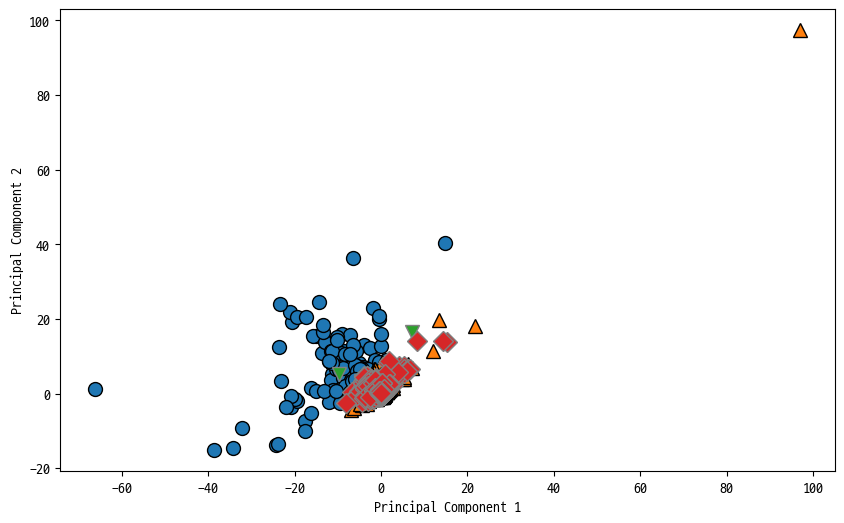

In [32]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df[feature])
plt.figure(figsize=(10, 6))
mglearn.discrete_scatter(principal_components[:, 0], principal_components[:, 1], df['군집_kmeans'])
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

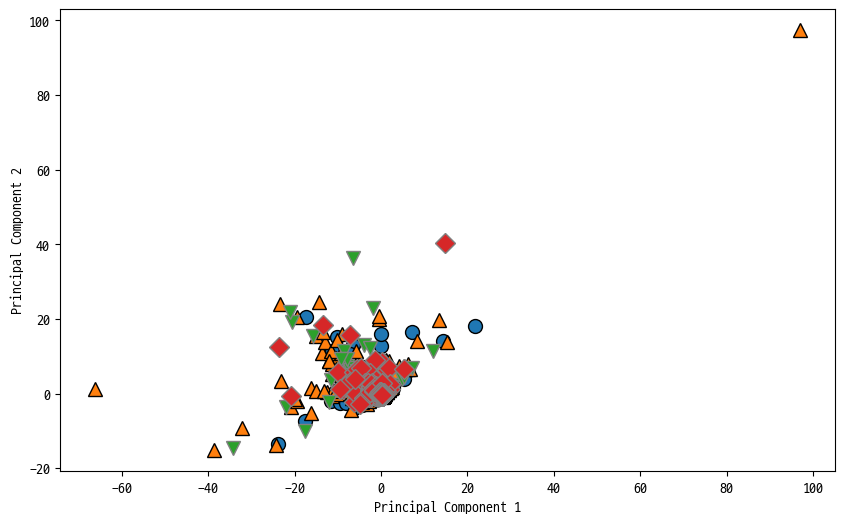

In [33]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df[feature])
plt.figure(figsize=(10, 6))
mglearn.discrete_scatter(principal_components[:, 0], principal_components[:, 1], df['군집_KMmodes'])
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

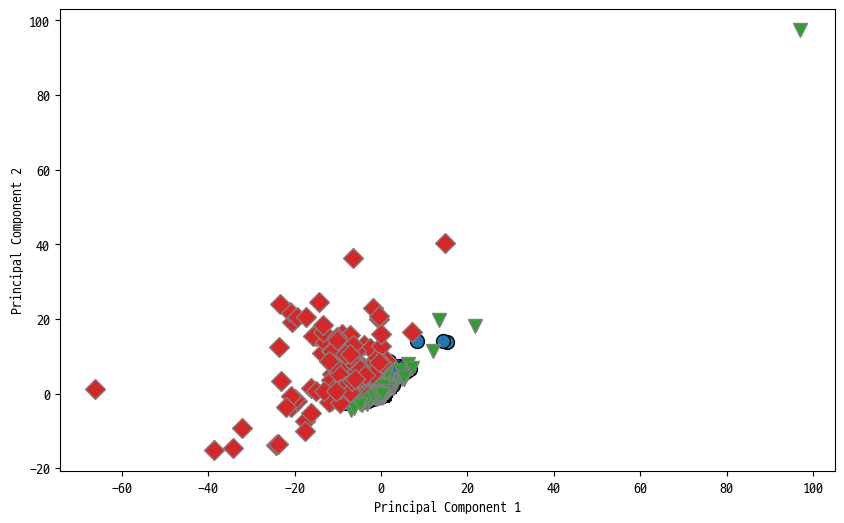

In [34]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df[feature])
plt.figure(figsize=(10, 6))
mglearn.discrete_scatter(principal_components[:, 0], principal_components[:, 1], df['군집_KPrototypes'])
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

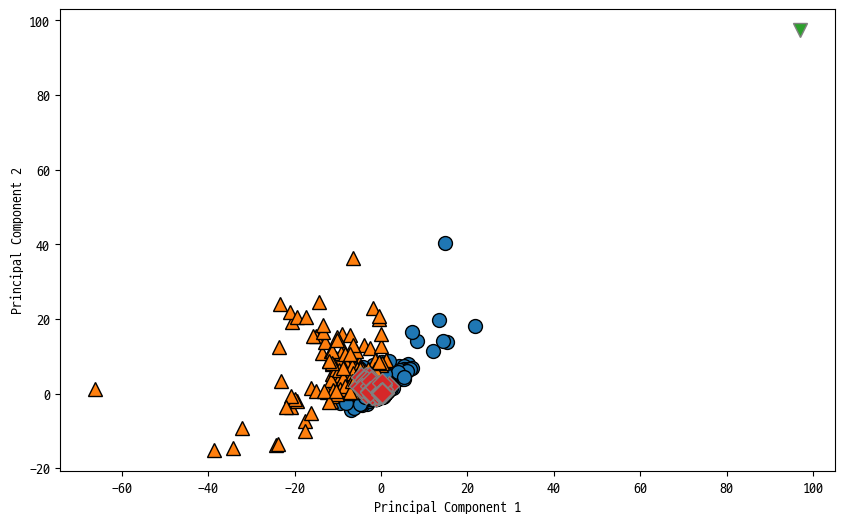

In [35]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df[feature])
plt.figure(figsize=(10, 6))
mglearn.discrete_scatter(principal_components[:, 0], principal_components[:, 1], df['군집_AgglomerativeClustering'])
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

In [43]:
df_feature=df[['창업횟수', '창업인원', '매출액', '영업이익', '금융비용', '당기순이익', 'B2C소비자매출', 'B2G정부매출',
       '연간자금사용금액', '전체인력', '자산대비자금사용비율','기업형태_개인',
       '기업형태_법인', '창업자학력_고졸', '창업자학력_대졸', '창업자학력_박사', '창업자학력_석사', '창업자학력_전문대졸',
       '창업자학력_중졸이하', '사업장입지_기타', '사업장입지_대학', '사업장입지_산업단지', '사업장입지_일반상업',
       '사업장입지_일반주택', '창업이전_창업이전자기자금', '창업이전_창업이전자기자금창업이전개인간차용',
       '창업이전_창업이전자기자금창업이전은행비은행대출', '창업이후_창업이후개인간차용', '창업이후_창업이후자기자금',
       '창업이후_창업이후자기자금창업이후은행비은행대출']]
obj=['기업형태_개인',
       '기업형태_법인', '창업자학력_고졸', '창업자학력_대졸', '창업자학력_박사', '창업자학력_석사', '창업자학력_전문대졸',
       '창업자학력_중졸이하', '사업장입지_기타', '사업장입지_대학', '사업장입지_산업단지', '사업장입지_일반상업',
       '사업장입지_일반주택', '창업이전_창업이전자기자금', '창업이전_창업이전자기자금창업이전개인간차용',
       '창업이전_창업이전자기자금창업이전은행비은행대출', '창업이후_창업이후개인간차용', '창업이후_창업이후자기자금',
       '창업이후_창업이후자기자금창업이후은행비은행대출']

In [51]:
df['군집_KMeans_all'] = kmeans.fit_predict(df[feature])
df['군집_AgglomerativeClustering_all'] = agg_clustering.fit_predict(df[feature])
df['군집_Kprototypes_all'] = kproto.fit_predict(df_feature, categorical=[11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 3390, ncost: 201052.24462087604
Run: 1, iteration: 2/100, moves: 2223, ncost: 198408.60801876735
Run: 1, iteration: 3/100, moves: 1707, ncost: 196351.02809983824
Run: 1, iteration: 4/100, moves: 279, ncost: 195921.32460978426
Run: 1, iteration: 5/100, moves: 36, ncost: 195888.38694750215
Run: 1, iteration: 6/100, moves: 8, ncost: 195880.42232182217
Run: 1, iteration: 7/100, moves: 8, ncost: 195866.18771723504
Run: 1, iteration: 8/100, moves: 9, ncost: 195852.66655838548
Run: 1, iteration: 9/100, moves: 6, ncost: 195847.85727615238
Run: 1, iteration: 10/100, moves: 4, ncost: 195844.64302765334
Run: 1, iteration: 11/100, moves: 0, ncost: 195844.64302765334
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 1153, ncost: 213432.34798661846
Run: 2, iteration: 2/100, moves: 481, ncost: 212105.8212514497
Run: 2, iteratio

원핫인코딩후 수치형(범주형)으로만 군집화 했을때의 실루엣계수

In [39]:
from sklearn.metrics import silhouette_score

# 각 군집화 알고리즘의 실루엣 점수 계산
silhouette_scores = {}
for algorithm in ['kmeans', 'KMmodes', 'KPrototypes', 'AgglomerativeClustering']:
    score = silhouette_score(df[feature], df[f'군집_{algorithm}'])
    silhouette_scores[algorithm] = score

# 결과 출력
print("실루엣 점수:")
for algorithm, score in silhouette_scores.items():
    print(f"{algorithm}: {score}")


실루엣 점수:
kmeans: 0.1781198073848929
KMmodes: 0.06175917949294344
KPrototypes: 0.18645997829801955
AgglomerativeClustering: 0.44299257754498184


원핫인코딩후 전체로 군집화 했을때의 실루엣계수

In [52]:
from sklearn.metrics import silhouette_score

# 각 군집화 알고리즘의 실루엣 점수 계산
silhouette_scores = {}
for algorithm in ['KMeans', 'AgglomerativeClustering','Kprototypes']:
    score = silhouette_score(df[feature], df[f'군집_{algorithm}_all'])
    silhouette_scores[algorithm] = score

# 결과 출력
print("실루엣 점수:")
for algorithm, score in silhouette_scores.items():
    print(f"{algorithm}: {score}")

실루엣 점수:
KMeans: 0.17789437221444673
AgglomerativeClustering: 0.384032926023755
Kprototypes: 0.1857054156584519


In [54]:
df.columns

Index(['창업횟수', '창업인원', '매출액', '영업이익', '금융비용', '당기순이익', 'B2C소비자매출', 'B2G정부매출',
       '연간자금사용금액', '전체인력', '자산대비자금사용비율', '군집_kmeans',
       '군집_AgglomerativeClustering', '군집_KMmodes', '군집_KPrototypes', '기업형태_개인',
       '기업형태_법인', '창업자학력_고졸', '창업자학력_대졸', '창업자학력_박사', '창업자학력_석사', '창업자학력_전문대졸',
       '창업자학력_중졸이하', '사업장입지_기타', '사업장입지_대학', '사업장입지_산업단지', '사업장입지_일반상업',
       '사업장입지_일반주택', '창업이전_창업이전자기자금', '창업이전_창업이전자기자금창업이전개인간차용',
       '창업이전_창업이전자기자금창업이전은행비은행대출', '창업이후_창업이후개인간차용', '창업이후_창업이후자기자금',
       '창업이후_창업이후자기자금창업이후은행비은행대출', '군집_KMeans_all',
       '군집_AgglomerativeClustering_all', '군집_Kprototypes_all'],
      dtype='object')

In [55]:
desired_column_order = ['창업횟수', '창업인원', '매출액', '영업이익', '금융비용', '당기순이익', 'B2C소비자매출', 'B2G정부매출',
       '연간자금사용금액', '전체인력', '자산대비자금사용비율', '기업형태_개인',
       '기업형태_법인', '창업자학력_고졸', '창업자학력_대졸', '창업자학력_박사', '창업자학력_석사', '창업자학력_전문대졸',
       '창업자학력_중졸이하', '사업장입지_기타', '사업장입지_대학', '사업장입지_산업단지', '사업장입지_일반상업',
       '사업장입지_일반주택', '창업이전_창업이전자기자금', '창업이전_창업이전자기자금창업이전개인간차용',
       '창업이전_창업이전자기자금창업이전은행비은행대출', '창업이후_창업이후개인간차용', '창업이후_창업이후자기자금',
       '창업이후_창업이후자기자금창업이후은행비은행대출','군집_kmeans',
       '군집_AgglomerativeClustering', '군집_KMmodes', '군집_KPrototypes' ,'군집_KMeans_all',
       '군집_AgglomerativeClustering_all', '군집_Kprototypes_all']

# 데이터프레임의 열 순서 변경
df = df.reindex(columns=desired_column_order)

In [57]:
df.to_csv('군집화알고리즘_분류.csv')